In [1]:
import time
import matplotlib.pyplot as plt
import qontrol_dev

In [2]:
"""
This example will show how to remove the 'current step' by using remove_current_step function.
It is worth noting that the current step is caused by hardware (amplifier), and it does not affect the actual set current value, only the measurement result.
So this is a fix at the software level.
"""

"\nThis example will show how to remove the 'current step' by using remove_current_step function.\nIt is worth noting that the current step is caused by hardware (amplifier), and it does not affect the actual set current value, only the measurement result.\nSo this is a fix at the software level.\n"

In [3]:
q = qontrol_dev.QXOutput(serial_port_name = "COM3")
print ("Qontroller '{:}' initialised with firmware {:} and {:} channels".format(q.device_id, q.firmware, q.n_chs) )

q.v[:] = 0

Qontroller 'None' initialised with firmware v2.4.1 and 8 channels


([2.359, 2.332, 2.341, 2.317, 2.35, 2.341, 2.335, 2.344],
 [0.0159,
  0.015300000000000001,
  0.015600000000000001,
  0.0152,
  0.0162,
  0.0149,
  0.016399999999999998,
  0.0149])

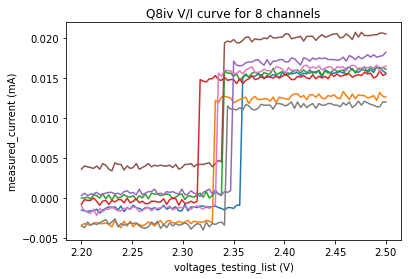

In [4]:
q.measure_current_step()

"""
User can use measure_current_step() function to see the 'current step' of every channel

!!! But it will take a considerable time to finish, exact time depends on the total number of channels
!!! If you want to save time, please pass parameters to this function to do a custom test
"""

([2.4], [0.0187])

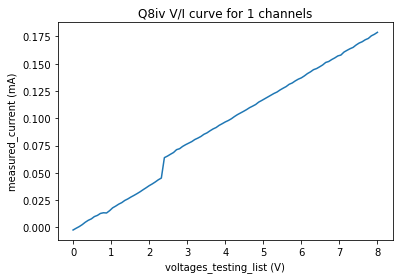

In [5]:
q.measure_current_step (min_value = 0, max_value = 8, test_points = 101, test_channel = 0, custom_test = True)

"""
User can do a custom test for a specific channel to save time

min_value and max_value:    will decide the voltage range for the test
test_points:                affects the precision
test_channel:               channel that user tests
custom_test:                set to 'True' if you need to do a custom test, defult value is 'False'
"""

Do you want to import data? Input Y/y to continue:  n
Do you want to measure the current step for all channels? Input Y/y to continue:  y


Start collecting data
collecting data for channel 7 ...     [########] 8/8
Data collection completed


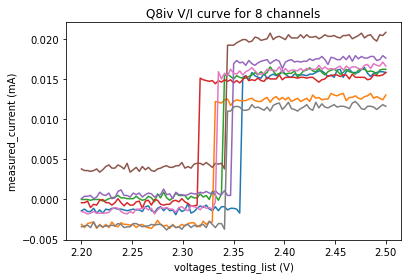

In [6]:
q.remove_current_step()

"""
Using it to remove the 'current step'
This function will measure the 'current step' and where it happens, then put data into 2 txt files (current_step.txt and voltages.txt)

!!! It will first ask you 'Do you want to import data?'. If you run this function before, you may want to import data rather than do the measurement again.
!!! If you type 'n' (can be any key except 'Y' or 'y'), the it will ask 'Do you want to measure the current step for all channels?'. Type 'Y' or 'y' to do it.
!!! If you type 'n' twice for the pervious questions, you will quit and disable this 'remove_current_step()' function
"""

([], [])

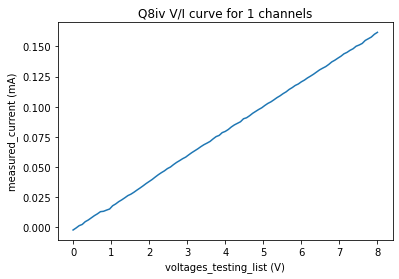

In [8]:
q.measure_current_step (min_value = 0, max_value = 8, test_points = 101, test_channel = 0, custom_test = True)

"""
Now, if we run this 'measure_current_step()' function again, we can see the 'current step' is removed
"""

([2.35], [0.016])

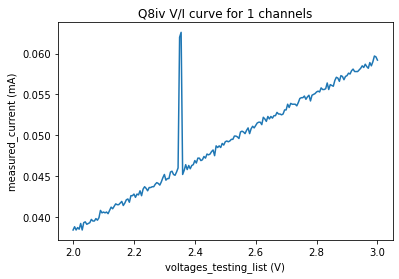

In [10]:
q.measure_current_step (min_value = 2, max_value = 3, test_points = 201, test_channel = 0, custom_test = True)

"""
However, if we try to use small voltage step in the test, there will be a spike rather than step, which we saw in the pervious test
"""

In [12]:
q.remove_current_step(adjustment_value = 0.03)

"""
If you want, you can pass this 'adjustment_value' to remove the spike.
Because the amplifier create a floating voltage around ~0.05V, so 'current step' can not be remove completely. Therefore, a spike is left

!!! This adjustment_value has a defult value of 0.01
!!! To change this value, just run this 'remove_current_step()' again, and type 'y' for the first question, no need for measuring the current step again.
"""

Do you want to import data? Input Y/y to continue:  y


Loading data...
[2.352, 2.332, 2.341, 2.317, 2.35, 2.344, 2.335, 2.344]
[0.0169, 0.015000000000000001, 0.014700000000000001, 0.0158, 0.016399999999999998, 0.015399999999999999, 0.016200000000000003, 0.0147]
Data loaded


"\nIf you want, you can pass this 'adjustment_value' to remove the spike.\nBecause the amplifier create a floating voltage around ~0.05V, so 'current step' can not be remove completely. Therefore, a spike is left\n\n!!! This adjustment_value has a defult value of 0.01\n!!! To change this value, just run this 'remove_current_step()' again, user can type 'n' for the 2 questions, no need for measuring the current step again.\n"

([], [])

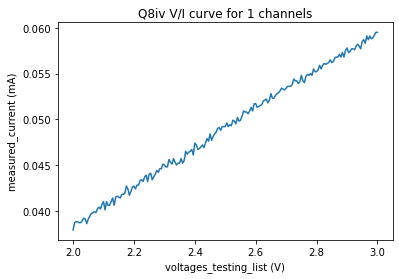

In [13]:
q.measure_current_step (min_value = 2, max_value = 3, test_points = 201, test_channel = 0, custom_test = True)

In [55]:
q.close()